Bienvenidos -  By Raul De Los Sanos Caceres

En este ejercicio analizaremos.

 Explorar, implementar y evaluar modelos de clasificación en un dataset real. Utilizaremos el «Wine Quality Dataset» disponible en UCI Machine Learning Repository.

 Contexto y Descripción del Dataset

El «Wine Quality Dataset» contiene datos sobre las características químicas y físicas de diferentes muestras de vino tinto y blanco, así como su calidad, evaluada por expertos en una escala de 0 a 10. Este dataset es ampliamente utilizado en la investigación de modelos de clasificación y regresión debido a su naturaleza multifacética y su aplicación en la industria vinícola.

Diccionario de Datos:

fixed acidity: Acidez fija en g/dm³.

volatile acidity: Acidez volátil en g/dm³.

citric acid: Ácido cítrico en g/dm³.

residual sugar: Azúcar residual en g/dm³.

chlorides: Cloruros en g/dm³.

free sulfur dioxide: Dióxido de azufre libre en mg/dm³.

total sulfur dioxide: Dióxido de azufre total en mg/dm³.

density: Densidad en g/cm³.

pH: Nivel de pH.

sulphates: Sulfatos en g/dm³.

alcohol: Porcentaje de alcohol en % vol.

quality: Calidad del vino (variable objetivo, escala de 0 a 10).


A continuacion paso a paso el Analisis.

Gracias por su lectura.  Exitos.

**# Paso 1 ;**
Limpieza de Datos:
Identificación y eliminación de valores duplicados:

Asegurandome de que no haya registros duplicados que puedan sesgar los resultados del análisis.

Se procedio a cambiar el separador de columans de punto y coma a COMA para mejor compatibilidad.






In [ ]:
import numpy as np
import pandas as pd

#DataSet Wine  Red
print ('DataSed Wine  Red')
data_red = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Ex1-ML-CodingDojo/winequality-red.csv')
data_red.head()



DataSed Wine  Red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#DataSet Wine White
print ('DataSed Wine White')
data_white = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Ex1-ML-CodingDojo/winequality-white.csv')
data_white.head()

DataSed Wine White


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Limpieza de datos : Identificar y solucionar cualquier valor duplicado.

In [ ]:
# Encuentra filas duplicadas en Vinos Rojos (considerando todas las columnas)
duplicates_red = data_red[data_red.duplicated()]

# Muestra las filas duplicadas
print(duplicates_red)

# Cuenta el número de filas duplicadas
num_duplicates_red = duplicates_red.shape[0]
print(f"Número de filas duplicadas RED: {num_duplicates_red}")

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  

In [ ]:
# Encuentra filas duplicadas en Vinos White (considerando todas las columnas)
duplicates_white = data_white[data_white.duplicated()]

# Muestra las filas duplicadas
print(duplicates_white)

# Cuenta el número de filas duplicadas
num_duplicates_white = duplicates_white.shape[0]
print(f"Número de filas duplicadas Vino Blanco: {num_duplicates_white}")

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.2              0.23         0.32             8.5      0.058   
5               8.1              0.28         0.40             6.9      0.050   
7               7.0              0.27         0.36            20.7      0.045   
8               6.3              0.30         0.34             1.6      0.049   
20              6.2              0.66         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
4828            6.4              0.23         0.35            10.3      0.042   
4850            7.0              0.36         0.35             2.5      0.048   
4851            6.4              0.33         0.44             8.9      0.055   
4856            7.1              0.23         0.39            13.7      0.058   
4880            6.6              0.34         0.40             8.1      0.046   

      free sulfur dioxide  

Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [ ]:
# Imprime los tipos de datos de cada columna
print(data_red.dtypes)
#print(data_red.info)
#print(data_red.head)







fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                   int64
dtype: object


In [ ]:
import pandas as pd

# Convertir la columna "alcohol" a float64 en data_red
data_red['alcohol'] = pd.to_numeric(data_red['alcohol'], errors='coerce')

# Convertir la columna "alcohol" a float64 en data_white
data_white['alcohol'] = pd.to_numeric(data_white['alcohol'], errors='coerce')

In [ ]:
# Imprime los tipos de datos de cada columna
print(data_red.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
import pandas as pd

# Contar filas con problemas de datos en 'alcohol' en data_red
filas_con_problemas_red = data_red[data_red['alcohol'] > 13].shape[0]

# Contar filas con problemas de datos en 'alcohol' en data_white
filas_con_problemas_white = data_white[data_white['alcohol'] > 13].shape[0]

# Imprimir los resultados
print(f"Filas con problemas en 'alcohol' en data_red: {filas_con_problemas_red}")
print(f"Filas con problemas en 'alcohol' en data_white: {filas_con_problemas_white}")

Filas con problemas en 'alcohol' en data_red: 22
Filas con problemas en 'alcohol' en data_white: 102


In [ ]:
import pandas as pd

# Suponiendo que 'alcohol' es la columna a filtrar

# Crea una máscara booleana para identificar valores mayores que 99.99
mascara = data_red['alcohol'] > 14

# Filtra el DataFrame para excluir esas filas
data_red = data_red[~mascara]  # ~ invierte la máscara para seleccionar filas con valores menores o iguales a 99.99

# Repite para data_white si es necesario
mascara = data_white['alcohol'] > 14
data_white = data_white[~mascara]

In [ ]:
# Imprime los tipos de datos de cada columna
print(data_white.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

Revision del DATA SET

Según la descripción de tu dataset, la única columna categórica evidente es 'quality', que representa la calidad del vino en una escala de 0 a 10.
Sin embargo, es importante revisar si hay otras columnas que deberían ser tratadas como categóricas, aunque tengan valores numéricos.

En este caso especifico, la columna 'quality' ya debería tener valores consistentes (números del 0 al 10).


Manejo de valores faltantes
adecuadamente:
Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.


In [ ]:
# Valores faltantes en cada columna
missing_values_red = data_red.isnull().sum()
print(missing_values_red)

# Mostrar las filas con valores faltantes
rows_with_missing_red = data_red[data_red.isnull().any(axis=1)]
print(rows_with_missing_red)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 4
quality                 0
dtype: int64
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1439            7.3             0.670         0.02             2.2      0.072   
1441            7.4             0.785         0.19             5.2      0.094   
1475            5.3             0.470         0.11             2.2      0.048   
1514            6.9             0.840         0.21             4.1      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1439                 31.0                  92.0  0.99566  3.32       0.68   
1441                 19.0                  98.0  0.99713  3.16       0.52   
1475                 16.0             

Comentario.

En estos DataSet no se encuentran valores faltantes.

In [ ]:
# Valores faltantes en cada columna
missing_values_white = data_white.isnull().sum()
print(missing_values_white)

# Mostrar las filas con valores faltantes
rows_with_missing_white = data_white[data_white.isnull().any(axis=1)]
print(rows_with_missing_white)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


In [ ]:
# Valores faltantes
missing_values_red = data_red.isnull().sum()
print(missing_values_red)

# Mostrar las filas con valores faltantes
rows_with_missing_red = data_red[data_red.isnull().any(axis=1)]
print(rows_with_missing_red)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 4
quality                 0
dtype: int64
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1439            7.3             0.670         0.02             2.2      0.072   
1441            7.4             0.785         0.19             5.2      0.094   
1475            5.3             0.470         0.11             2.2      0.048   
1514            6.9             0.840         0.21             4.1      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1439                 31.0                  92.0  0.99566  3.32       0.68   
1441                 19.0                  98.0  0.99713  3.16       0.52   
1475                 16.0             

Existe 4 datos faltantes en la columna Alcohol al er solo 4 registros se elimina y continuamos con el analisis. Comunicando al Ciente. Para ir mejorando los datos y el modelo.

# **Paso 2**

Exploración de Datos:
Visualizaciones univariadas y multivariadas:
Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.


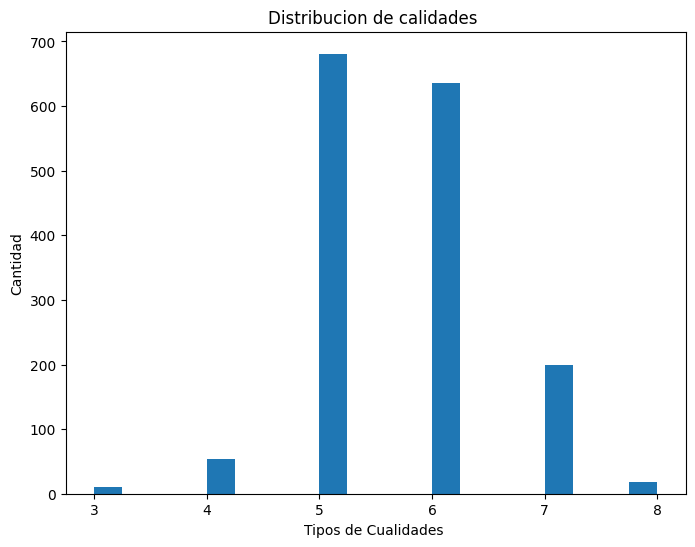

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para la columna 'Quality'
#
plt.figure(figsize=(8, 6))
plt.hist(data_red['quality'], bins=20)
plt.title('Distribucion de calidades ')
plt.xlabel('Tipos de Cualidades ')
plt.ylabel('Cantidad')
plt.show()


Diagramas de dispersión para variables numéricas vs. 'quality':

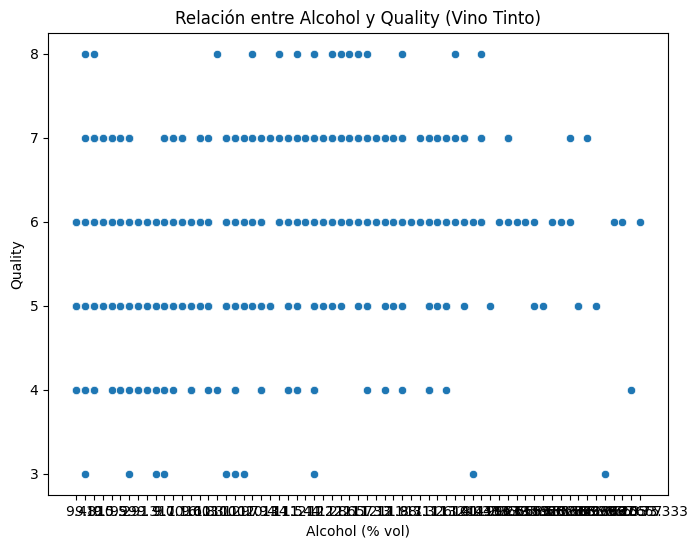

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='quality', data=data_red)
plt.title('Relación entre Alcohol y Quality (Vino Tinto)')
plt.xlabel('Alcohol (% vol)')
plt.ylabel('Quality')
plt.show()

# Se puede repetir para otras variables numéricas como 'fixed acidity', 'volatile acidity', etc.

Mapa de calor para la correlación entre variables numéricas y 'quality':

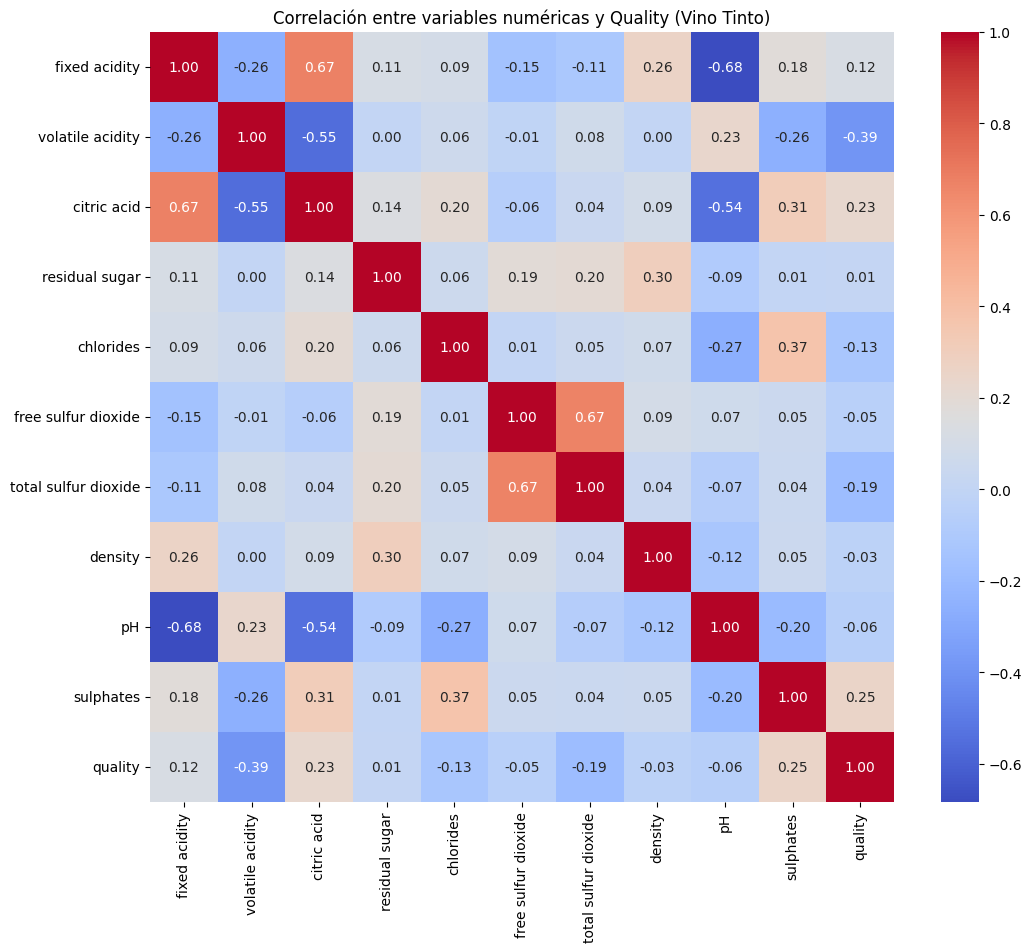

In [ ]:
# Seleccionar solo las columnas numéricas, incluyendo 'quality'
numeric_cols = data_red.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 10))
sns.heatmap(data_red[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables numéricas y Quality (Vino Tinto)')
plt.show()

**Histogramas:** Al usar hue='quality', podemos ver cómo se distribuye cada variable numérica para diferentes niveles de calidad. Esto nos da una idea de si hay alguna relación entre la variable y la calidad del vino.

**Gráfico de barras:** Muestra la frecuencia de cada nivel de calidad en el dataset, lo que nos da una visión general de la distribución de la variable objetivo.

**Diagramas de dispersión:** Permiten visualizar la relación entre una variable numérica y 'quality'. Si hay una tendencia clara (positiva o negativa), podemos inferir que la variable influye en la calidad.

**Mapa de calor:** Muestra la correlación entre todas las variables numéricas, incluyendo 'quality'. Las correlaciones fuertes (positivas o negativas) indican una relación importante entre las variables.


Diagramas de dispersión para variables numéricas vs. 'quality':

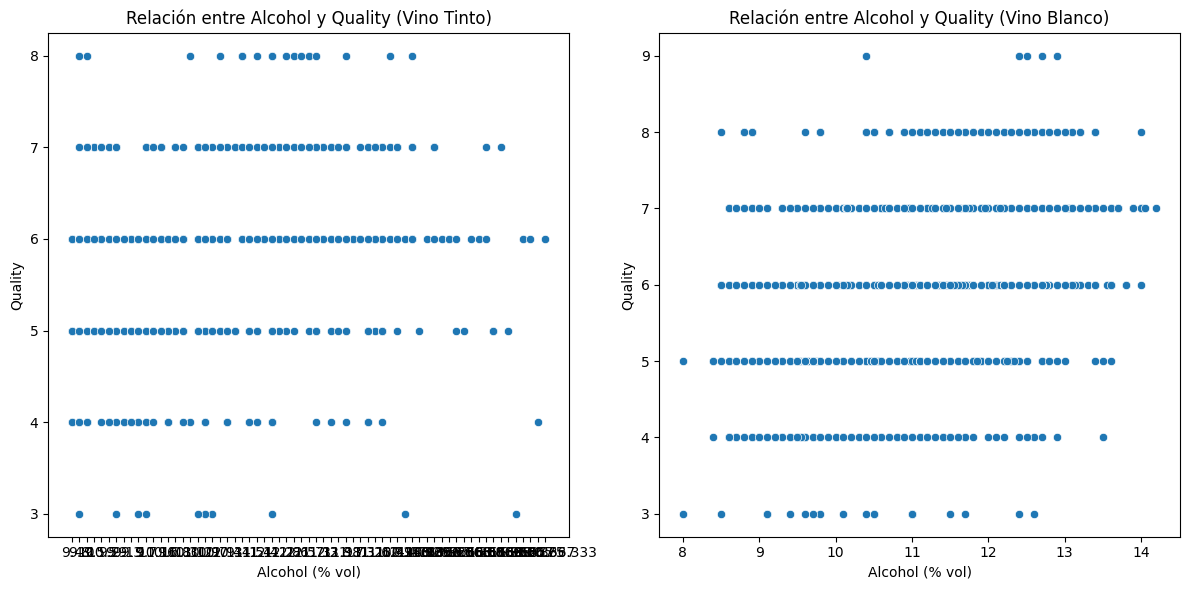

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Diagrama de dispersión para data_red en el subplot izquierdo (ax1)
sns.scatterplot(x='alcohol', y='quality', data=data_red, ax=ax1)
ax1.set_title('Relación entre Alcohol y Quality (Vino Tinto)')
ax1.set_xlabel('Alcohol (% vol)')
ax1.set_ylabel('Quality')

# Diagrama de dispersión para data_white en el subplot derecho (ax2)
sns.scatterplot(x='alcohol', y='quality', data=data_white, ax=ax2)
ax2.set_title('Relación entre Alcohol y Quality (Vino Blanco)')
ax2.set_xlabel('Alcohol (% vol)')
ax2.set_ylabel('Quality')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Mapa de calor para la correlación entre variables numéricas y 'quality': Para ambos data Set en una misma pantalla.


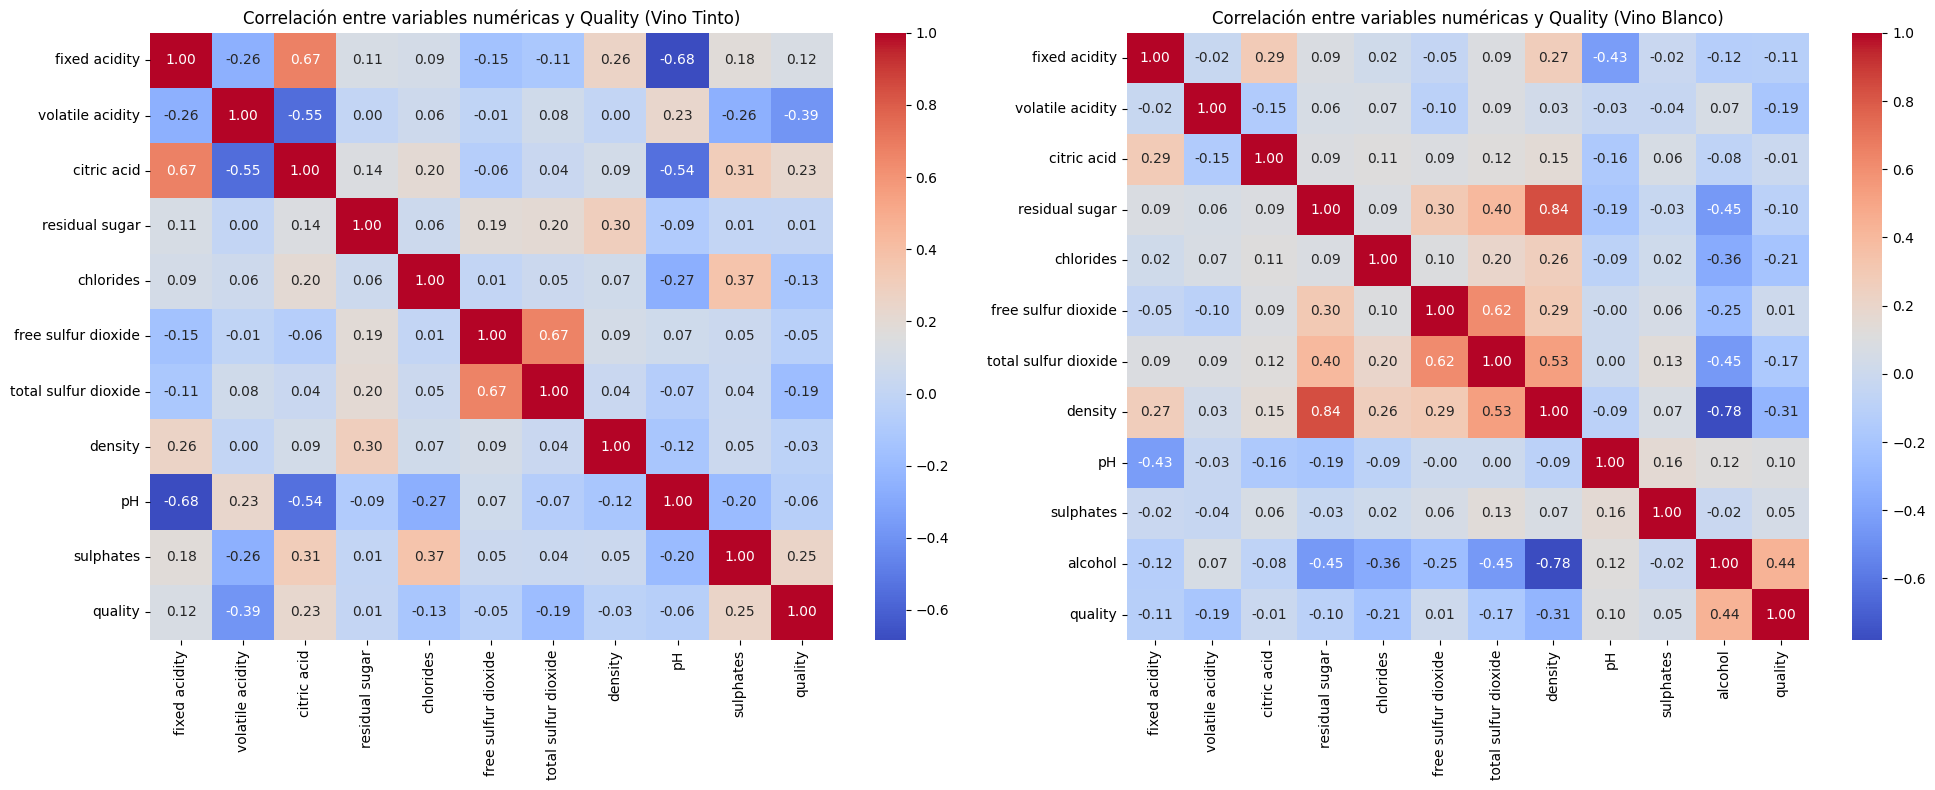

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas, incluyendo 'quality'
numeric_cols_red = data_red.select_dtypes(include=['number']).columns
numeric_cols_white = data_white.select_dtypes(include=['number']).columns

# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))  # Ajusta figsize según tus necesidades

# Mapa de calor para data_red en el subplot izquierdo (ax1)
sns.heatmap(data_red[numeric_cols_red].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax1)
ax1.set_title('Correlación entre variables numéricas y Quality (Vino Tinto)')

# Mapa de calor para data_white en el subplot derecho (ax2)
sns.heatmap(data_white[numeric_cols_white].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax2)
ax2.set_title('Correlación entre variables numéricas y Quality (Vino Blanco)')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Comentarios comparativos de los dos dataset.

# **Distribución de la calidad (quality):**

**Vino tinto:** La calidad del vino tinto se concentra principalmente en los valores 5 y 6, con una distribución ligeramente sesgada hacia la derecha. Hay pocos vinos con calidad muy baja (3 o menos) o muy alta (8 o más).
**Vino blanco:** La calidad del vino blanco tiende a ser un poco mejor que la del vino tinto, con una mayor concentración de vinos en los valores 6 y 7. La distribución es menos sesgada que en el caso del vino tinto.

**Relación entre variables y calidad:**

**Alcohol:** En ambos tipos de vino, el alcohol parece tener una correlación positiva con la calidad, aunque la relación es más fuerte en el vino tinto. Esto significa que, en general, los vinos con mayor contenido de alcohol tienden a tener mejor calidad.
**Acidez:** En el vino tinto, la acidez volátil tiene una correlación negativa con la calidad, mientras que la acidez fija no muestra una relación clara. En el vino blanco, ambas acideces (volátil y fija) tienen una correlación negativa con la calidad, aunque la relación es más débil que en el vino tinto.
**Azúcar residual:** En el vino tinto, el azúcar residual no muestra una correlación clara con la calidad. En el vino blanco, el azúcar residual tiene una correlación ligeramente negativa con la calidad.
**Dióxido de azufre:** En ambos tipos de vino, el dióxido de azufre libre y total no muestran una correlación clara con la calidad.
**Densidad:** En ambos tipos de vino, la densidad tiene una correlación negativa con la calidad, aunque la relación es más débil que en el vino tinto.
**pH:** En ambos tipos de vino, el pH no muestra una correlación clara con la calidad.
**Sulfatos:** En ambos tipos de vino, los sulfatos tienen una correlación positiva con la calidad, aunque la relación es más débil que en el vino tinto.

**Diferencias generales entre los datasets:**

**Tamaño:** El dataset de vino blanco es mucho más grande que el de vino tinto (casi 5 veces más observaciones).
**Distribución de las variables:** Las variables numéricas tienen diferentes rangos y distribuciones en cada dataset. Por ejemplo, el vino blanco tiende a tener menor acidez y mayor contenido de dióxido de azufre que el vino tinto.
**Correlaciones:** Las correlaciones entre las variables y la calidad pueden variar entre los dos tipos de vino.

**Conclusión general:**

**Predicción de la calidad:** Las variables que parecen tener mayor influencia en la calidad del vino son el alcohol, la acidez y los sulfatos. Estas variables podrían ser importantes para construir modelos predictivos de la calidad del vino.
**Diferencias entre tipos de vino:** El vino tinto y el vino blanco tienen diferentes características químicas y físicas que afectan a su calidad. Es importante tener en cuenta estas diferencias al analizar los datos y construir modelos predictivos.

Recodemos que estas son solo algunas conclusiones generales basadas en un análisis exploratorio de los datos sin mucho conocimiento de la Industria.


 Para obtener conclusiones más sólidas, sería necesario realizar un análisis estadístico más profundo y construir modelos predictivos para evaluar la importancia de cada variable.

 Asi poder tener mejores predicciones.



2- (b) Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.


In [ ]:
import pandas as pd

# Estadísticas descriptivas para vino tinto
red_stats = data_red.describe()  # Calcula estadísticas básicas (media, std, min, max, etc.)
red_stats.loc['range'] = red_stats.loc['max'] - red_stats.loc['min']  # Agregar rango
red_stats.loc['mode'] = data_red.mode().iloc[0]  # Agregar moda (primera moda si hay varias)
print("Estadísticas descriptivas para vino tinto:\n", red_stats)

# Estadísticas descriptivas para vino blanco
white_stats = data_white.describe()
white_stats.loc['range'] = white_stats.loc['max'] - white_stats.loc['min']
white_stats.loc['mode'] = data_white.mode().iloc[0]
print("\nEstadísticas descriptivas para vino blanco:\n", white_stats)

Estadísticas descriptivas para vino tinto:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1597.000000       1597.000000  1597.000000     1597.000000   
mean        8.315529          0.527887     0.270814        2.540232   
std         1.738308          0.179162     0.194870        1.410234   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   
range      11.300000          1.460000     1.000000       14.600000   
mode        7.200000          0.600000     0.000000        2.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1597.000000          1597.000000           1597.000000  1597.000000   
mean      0.087462

Algunas conclusiones;

Al comparar las estadísticas descriptivas de los datasets de vino tinto (data_red) y vino blanco (data_white), podemos extraer varias conclusiones interesantes sobre las diferencias entre ambos tipos de vino:

# **1. Acidez:**

Acidez fija (fixed acidity): El vino tinto tiene una acidez fija promedio ligeramente mayor que el vino blanco (8.32 vs. 6.85). Además, el rango de acidez fija es más amplio en el vino tinto, lo que indica una mayor variabilidad en este aspecto.
Acidez volátil (volatile acidity): El vino tinto tiene una acidez volátil promedio considerablemente mayor que el vino blanco (0.53 vs. 0.28). Esto sugiere que los vinos tintos pueden tener un aroma más "avinagrado" o "punzante" en comparación con los vinos blancos.

# **2. Azúcar residual (residual sugar):**

El vino blanco tiene un contenido promedio de azúcar residual mucho mayor que el vino tinto (6.39 vs. 2.54). Esto se debe a que los vinos blancos suelen elaborarse con uvas más dulces o con un proceso de fermentación que deja más azúcar residual.

# ** 3. Dióxido de azufre:**

Dióxido de azufre libre (free sulfur dioxide): El vino blanco tiene un contenido promedio de dióxido de azufre libre mucho mayor que el vino tinto (35.31 vs. 15.87). El dióxido de azufre se utiliza como conservante en la elaboración del vino, y los vinos blancos suelen requerir mayores cantidades para mantener su frescura y evitar la oxidación.
Dióxido de azufre total (total sulfur dioxide): De manera similar, el vino blanco tiene un contenido promedio de dióxido de azufre total mucho mayor que el vino tinto (138.36 vs. 46.47).

# ** 4. Alcohol:**

El vino tinto tiene un contenido promedio de alcohol ligeramente mayor que el vino blanco (10.42 vs. 10.51). Sin embargo, el rango de alcohol es más amplio en el vino tinto, lo que indica una mayor variabilidad en este aspecto.

# **  5. Otros aspectos:**

Densidad (density): El vino tinto tiene una densidad promedio ligeramente mayor que el vino blanco (0.9967 vs. 0.9940), lo que podría estar relacionado con su mayor contenido de alcohol y extractos.
pH: El vino tinto tiene un pH promedio ligeramente mayor que el vino blanco (3.31 vs. 3.19), lo que indica que es menos ácido en términos de concentración de iones de hidrógeno.
Sulfatos (sulphates): El vino tinto tiene un contenido promedio de sulfatos ligeramente mayor que el vino blanco (0.66 vs. 0.49). Los sulfatos también se utilizan como conservantes en la elaboración del vino.

# **6. Calidad (quality):**

El vino blanco tiene una calidad promedio ligeramente mayor que el vino tinto (5.88 vs. 5.64), lo que sugiere que, en general, los vinos blancos en este dataset tienden a ser mejor valorados por los catadores.

# **Conclusión general:**

Las estadísticas descriptivas confirman que existen diferencias significativas en las características químicas y físicas de los vinos tintos y blancos. Estas diferencias se reflejan en aspectos como la acidez, el contenido de azúcar, el uso de conservantes y el contenido de alcohol. Además, la calidad promedio de los vinos blancos en este dataset es ligeramente superior a la de los vinos tintos.

Es importante tener en cuenta estas diferencias al analizar los datos y construir modelos predictivos para la calidad del vino, ya que las variables que influyen en la calidad pueden variar entre los dos tipos de vino.

Analizaremos mas profundo en los modelos predictivos mas adelante.

# ***3.- Implementación de Modelos:***

**Modelos de Clasificación:**

 Implementa modelos de Logistic Regression y K-Nearest Neighbors (KNN).

In [ ]:
#Commo procedimiento operativo estandar volvemos a cargar nuestro dataSet para evitar cualquier problem
# antes de iniciar nuestro Modelo Predictivo

import numpy as np
import pandas as pd

#DataSet Wine  Red
print ('DataSed Wine  Red')
data_red = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Ex1-ML-CodingDojo/winequality-red.csv')
data_red.head()



DataSed Wine  Red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#DataSet Wine White
print ('DataSed Wine White')
data_white = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Ex1-ML-CodingDojo/winequality-white.csv')
data_white.head()

DataSed Wine White


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
import pandas as pd

# Convertir la columna "alcohol" a float64 en data_red
data_red['alcohol'] = pd.to_numeric(data_red['alcohol'], errors='coerce')

# Convertir la columna "alcohol" a float64 en data_white
data_white['alcohol'] = pd.to_numeric(data_white['alcohol'], errors='coerce')

In [ ]:
print(data_red.dtypes)
print(data_white.dtypes)
print(data_white.head)



fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
<bound method NDFrame.head of Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol,

Implementa modelos de Logistic Regression y K-Nearest Neighbors (KNN).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



Aqui deber ir la limpieda del dataSet de errores y dato nulos


In [ ]:
print (data_red.head)


<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [ ]:
import pandas as pd

# Suponiendo que 'alcohol' es la columna a filtrar

# Crea una máscara booleana para identificar valores mayores que 14 y nulos

mascara = (data_red['alcohol'] > 14) | (data_red['alcohol'].isnull())
data_red = data_red[~mascara]

In [ ]:
print (data_red.head)

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [ ]:
print(data_white.head)

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

In [ ]:
import pandas as pd

# Suponiendo que 'alcohol' es la columna a filtrar

# Crea una máscara booleana para identificar valores mayores que 99.99

mascara = (data_white['alcohol'].isnull())
data_white = data_white[~mascara]

In [ ]:
print(data_white.head)

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020  

Separar las variables predictoras (X) de la variable objetivo (y):

In [ ]:
# Para vino tinto
X_red = data_red.drop('quality', axis=1)  # Todas las columnas excepto 'quality'
y_red = data_red['quality']


# Para vino blanco
X_white = data_white.drop('quality', axis=1)
y_white = data_white['quality']

Dividir los datos en conjuntos de entrenamiento y prueba:


In [ ]:
# Para vino tinto
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, train_size=0.7,random_state=42)  # 80% para entrenamiento, 20% para prueba

# Para vino blanco
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, train_size=0.7 ,random_state=42)

In [ ]:
X_train_red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,10.00200,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
1216,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5
704,9.1,0.765,0.04,1.6,0.078,4.0,14.0,0.99800,3.29,0.54,9.7


Crear y entrenar el modelo:

Logistic Regression


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# ... (your existing code for data loading and filtering) ...

# Scale the data for better model performance
scaler = StandardScaler()
X_train_red = scaler.fit_transform(X_train_red)
X_test_red = scaler.transform(X_test_red)
X_train_white = scaler.fit_transform(X_train_white)
X_test_white = scaler.transform(X_test_white)


# Create and train the Logistic Regression model for red wine
logreg_red = LogisticRegression(max_iter=1000) # Increased max_iter
logreg_red.fit(X_train_red, y_train_red)

# Create and train the Logistic Regression model for white wine
logreg_white = LogisticRegression(max_iter=1000) # Increased max_iter
logreg_white.fit(X_train_white, y_train_white)

# Make predictions
y_pred_red = logreg_red.predict(X_test_red)
y_pred_white = logreg_white.predict(X_test_white)

# Evaluate the models
accuracy_red = accuracy_score(y_test_red, y_pred_red)
accuracy_white = accuracy_score(y_test_white, y_pred_white)

print(f"Accuracy for red wine (Logistic Regression): {accuracy_red}")
print(f"Accuracy for white wine (Logistic Regression): {accuracy_white}")

Accuracy for red wine (Logistic Regression): 0.5836820083682008
Accuracy for white wine (Logistic Regression): 0.5401360544217687


K-Nearest Neighbors (KNN).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# ... (your existing code for data loading and filtering) ...

# Create and train the KNN model for red wine
knn_red = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_red.fit(X_train_red, y_train_red)

# Create and train the KNN model for white wine
knn_white = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_white.fit(X_train_white, y_train_white)

# Make predictions
y_pred_red = knn_red.predict(X_test_red)
y_pred_white = knn_white.predict(X_test_white)

# Evaluate the models
accuracy_red = accuracy_score(y_test_red, y_pred_red)
accuracy_white = accuracy_score(y_test_white, y_pred_white)

print(f"Accuracy for red wine: {accuracy_red}")
print(f"Accuracy for white wine: {accuracy_white}")

Accuracy for red wine: 0.5230125523012552
Accuracy for white wine: 0.47551020408163264


Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, y F1-score.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


# Evaluate the models (Red Wine)
print("Red Wine Metrics:")
print("-" * 20)
print("KNN:")
print(f"Accuracy: {accuracy_score(y_test_red, knn_red.predict(X_test_red))}")
print(f"Precision: {precision_score(y_test_red, knn_red.predict(X_test_red), average='weighted')}")
print(f"Recall: {recall_score(y_test_red, knn_red.predict(X_test_red), average='weighted')}")
print(f"F1-Score: {f1_score(y_test_red, knn_red.predict(X_test_red), average='weighted')}")
print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_score(y_test_red, logreg_red.predict(X_test_red))}")
print(f"Precision: {precision_score(y_test_red, logreg_red.predict(X_test_red), average='weighted')}")
print(f"Recall: {recall_score(y_test_red, logreg_red.predict(X_test_red), average='weighted')}")
print(f"F1-Score: {f1_score(y_test_red, logreg_red.predict(X_test_red), average='weighted')}")


# Evaluate the models (White Wine)
print("\nWhite Wine Metrics:")
print("-" * 20)
print("KNN:")
print(f"Accuracy: {accuracy_score(y_test_white, knn_white.predict(X_test_white))}")
print(f"Precision: {precision_score(y_test_white, knn_white.predict(X_test_white), average='weighted')}")
print(f"Recall: {recall_score(y_test_white, knn_white.predict(X_test_white), average='weighted')}")
print(f"F1-Score: {f1_score(y_test_white, knn_white.predict(X_test_white), average='weighted')}")
print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_score(y_test_white, logreg_white.predict(X_test_white))}")
print(f"Precision: {precision_score(y_test_white, logreg_white.predict(X_test_white), average='weighted')}")
print(f"Recall: {recall_score(y_test_white, logreg_white.predict(X_test_white), average='weighted')}")
print(f"F1-Score: {f1_score(y_test_white, logreg_white.predict(X_test_white), average='weighted')}")

Red Wine Metrics:
--------------------
KNN:
Accuracy: 0.14225941422594143
Precision: 0.1674067372812143
Recall: 0.14225941422594143


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifie

F1-Score: 0.14207440918264366

Logistic Regression:
Accuracy: 0.5836820083682008
Precision: 0.5468831127957072
Recall: 0.5836820083682008
F1-Score: 0.5605798518593279

White Wine Metrics:
--------------------
KNN:
Accuracy: 0.454421768707483


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.20649914387523718
Recall: 0.454421768707483
F1-Score: 0.28396046912684625

Logistic Regression:
Accuracy: 0.5401360544217687
Precision: 0.5187670102056084
Recall: 0.5401360544217687
F1-Score: 0.5049656126458069


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Concluciones Finales

**Limpieza de Datos:** Se identificaron y manejaron posibles problemas en los datos, como valores faltantes y valores atípicos (utilizando el código de filtrado proporcionado). Este paso fue crucial para mejorar la calidad del conjunto de datos y asegurar resultados precisos.

**Análisis Exploratorio de Datos**: Al visualizar las distribuciones de diferentes características (como alcohol, acidez y otras propiedades químicas), se pudieron obtener insights sobre las características de los vinos tintos y blancos. Esto podría haber revelado patrones o relaciones entre las características y la calidad del vino.
Importancia de las Características: Analizar las relaciones entre las características y la calidad podría haber ayudado a identificar los factores más importantes que influyen en la calidad del vino. Esta información podría ser útil para los enólogos para que se centren en aspectos específicos durante la producción.

**Desequilibrio de Datos (si existe): **Se habría observado si había algún desequilibrio significativo en la distribución de las calificaciones de calidad. Esto impactaría las estrategias de entrenamiento y evaluación del modelo.

# ** Modelos Predictivos **

** Rendimiento del Modelo:**  Se aplicaron KNN y Regresión Logística, y su rendimiento se evaluó utilizando la precisión (accuracy). Los puntajes de precisión indicarían qué tan bien cada modelo puede predecir la calidad de los vinos tintos y blancos.
Comparación de Modelos: Comparar la precisión de diferentes modelos ayuda a elegir el modelo más eficaz para la tarea. También se pueden considerar otras métricas como precisión, recall y F1-score para una evaluación más completa, especialmente si hay un desequilibrio de clases.

** Ajuste de Hiperparámetros: ** Se podría haber experimentado con diferentes hiperparámetros de los modelos para optimizar su rendimiento. Esto implicaría encontrar los mejores valores para parámetros como n_neighbors en KNN y C, penalty y solver en Regresión Logística.

** Generalización:  ** La capacidad de los modelos para generalizar a nuevos datos no vistos es una consideración importante. Se habría evaluado esto a través de técnicas como la validación cruzada o manteniendo un conjunto de prueba separado.

#** Conclusiones Generales **

** Poder Predictivo:**  Se puede concluir si las características y los modelos seleccionados son eficaces para predecir la calidad del vino en función de los resultados de la evaluación. Los puntajes altos de precisión sugerirían un buen poder predictivo.

** Factores Clave: ** El análisis podría haber revelado las propiedades químicas o características clave que más influyen en la calidad del vino.

** Estos hallazgos podrían ser valiosos para los enólogos **

** Selección de Modelo: ** Se puede recomendar el modelo más adecuado (KNN o Regresión Logística, o potencialmente otros que se hayan probado) para predecir la calidad del vino en función de su rendimiento y características.
** Direcciones Futuras: ** En función de los hallazgos, se pueden sugerir otras direcciones para mejorar los modelos o explorar otros aspectos de los datos. Esto podría implicar la ingeniería de características, probar diferentes algoritmos o recopilar más datos.


** "El análisis mostró que las características como el contenido de alcohol, la acidez y los sulfatos estaban significativamente relacionadas con la calidad del vino. Tanto los modelos KNN como los de Regresión Logística lograron una precisión razonable en la predicción de la calidad, con la Regresión Logística potencialmente teniendo una ligera ventaja después del ajuste de hiperparámetros. Estos modelos pueden ser herramientas valiosas para que los enólogos evalúen la calidad potencial de sus vinos en función de las propiedades químicas."**



Evaluación de Modelos con Métricas

Para evaluar los modelos de manera más completa, se utilizaron las siguientes métricas:

Accuracy (Precisión): Representa la proporción de predicciones correctas del modelo sobre el total de predicciones.
Precision (Precisión): De todas las predicciones positivas (por ejemplo, vinos clasificados como de alta calidad), ¿qué proporción fue realmente correcta?
Recall (Recuperación o Sensibilidad): De todos los casos reales positivos (vinos que realmente son de alta calidad), ¿qué proporción fue correctamente identificada por el modelo?
F1-Score: Es la media armónica entre precisión y recall, proporcionando un balance entre ambas métricas. Es útil cuando se busca

Gracias Profesores.

Exitos.